In [1]:
"""
Read dataset, drop columns like ward, and adm code
"""
import pandas as pd
import numpy as np

trainset = pd.read_csv('Train.csv')
train_targets = trainset['target']
trainset.drop(['ward', 'ADM4_PCODE'], axis=1, inplace=True)
trainset.head()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
0,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,...,0.019968,0.002848,0.007537,0.000000,0.012928,0,0,-29.682270,24.734743,0.292039
1,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,...,0.018946,0.014566,0.057127,0.019092,0.004131,0,0,-29.119311,24.757737,3.207775
2,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,...,0.083010,0.057560,0.010358,0.001421,0.040881,0,0,-29.142276,25.094093,0.000000
3,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,...,0.002689,0.000000,0.000669,0.000000,0.005011,0,0,-29.372052,24.942867,2.038778
4,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,...,0.009699,0.004859,0.001290,0.000673,0.017629,0,0,-29.409381,25.290165,0.000000


In [2]:
testset = pd.read_csv('Test.csv')
testset.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


In [3]:
print('number of numerical features: {}'.format(
        len(trainset.select_dtypes(include=['int64','float64']).columns)
    )
)

print('number of categorical features: {}'.format(
        len(trainset.select_dtypes(include=['object']).columns)
    )
)

number of numerical features: 61
number of categorical features: 0


In [4]:
train_targets.describe()

count    2822.000000
mean       24.507554
std        10.294387
min         0.000000
25%        16.751556
50%        24.156670
75%        32.226553
max        55.528423
Name: target, dtype: float64

In [5]:
train_targets.skew()

0.10929293833324322

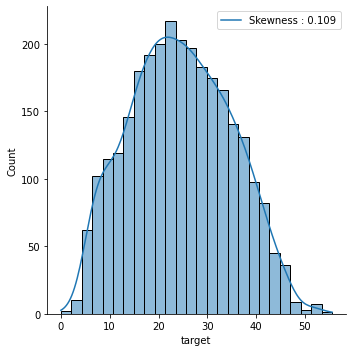

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(train_targets, kde=True)
plt.legend(['Skewness : {:.3f}'.format(train_targets.skew())], loc='best')

<AxesSubplot:>

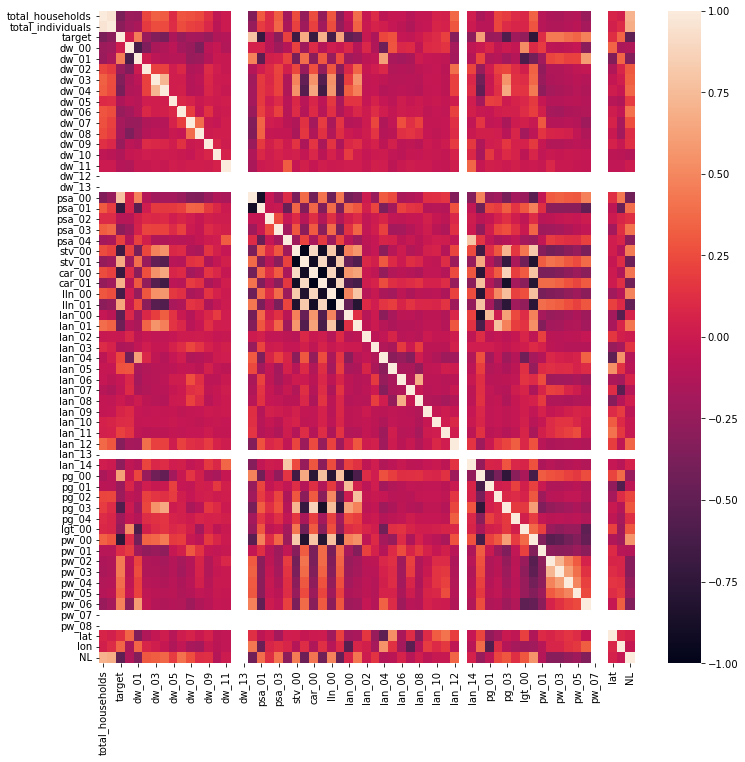

In [7]:
corrmat = trainset.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(trainset.corr())

<AxesSubplot:>

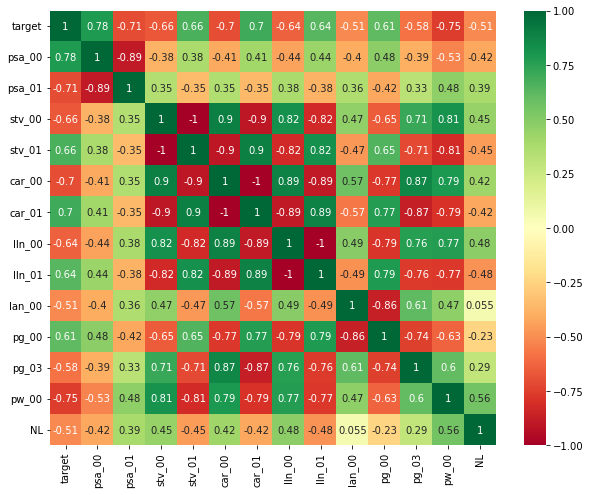

In [8]:
best_corr_features = corrmat.index[abs(corrmat['target']) > 0.5]

plt.figure(figsize=(10, 8))
sns.heatmap(trainset[best_corr_features].corr(), annot=True, cmap='RdYlGn')

In [9]:
feats = list(best_corr_features)
feats.remove('target')
print(f'Number of chosen features {len(feats)}')

Number of chosen features 13


In [77]:
def multi_plots(
    dataset,
    features,
    targets,
    n_rows=4,
    n_cols=3,
    figsize=(12, 12),
    kind='regplot',
):
    _, axes = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=figsize,
        gridspec_kw=dict(hspace=0.3, wspace=0.3)
    )
    colors = sns.color_palette(n_colors=n_rows * n_cols)
    if kind == 'regplot':
        for color, feature, ax in zip(colors, features, axes.flatten()):
            sns.regplot(
                data=dataset,
                x=feature,
                y=targets,
                ax=ax,
                color=color,
                line_kws={'color': 'black', 'alpha': 0.6}
            )
    elif kind == 'histplot':
        skew_values = []
        for color, feature, ax in zip(colors, features, axes.flatten()):
            sns.histplot(
                dataset[feature],
                kde=True,
                color=color,
                ax=ax,
            )
            ax.set_title('Skewness : {:.3f}'.format(dataset[feature].skew()))
            skew_values.append(dataset[feature].skew())
        return skew_values

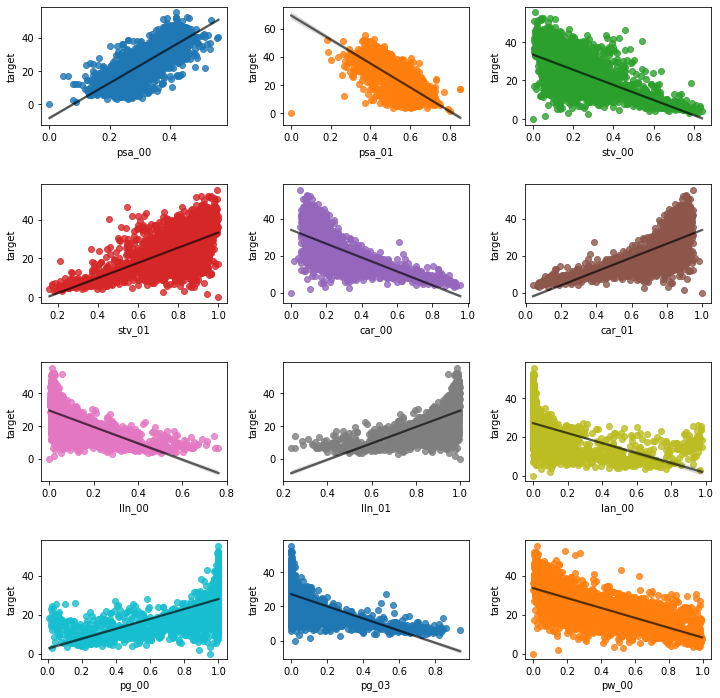

In [11]:
multi_plots(
    dataset=trainset,
    features=feats,
    n_rows=3,
    n_cols=3,
    targets=train_targets,
    kind='regplot'
)

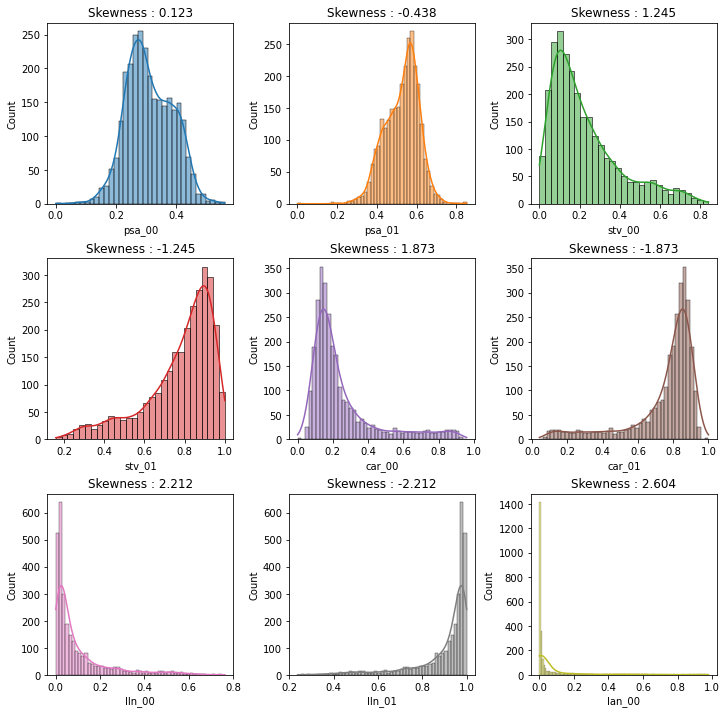

In [78]:
skew_values = multi_plots(
    dataset=trainset,
    features=feats,
    n_rows=3,
    n_cols=3,
    targets=train_targets,
    kind='histplot'
)

In [14]:
trainset.keys()

Index(['total_households', 'total_individuals', 'target', 'dw_00', 'dw_01',
       'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09',
       'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00',
       'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05',
       'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12',
       'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04',
       'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06',
       'pw_07', 'pw_08', 'lat', 'lon', 'NL'],
      dtype='object')

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)

losses = []
test_preds = []
oof_preds = np.zeros_like(train_targets)

for fold, (train_idx, val_idx) in enumerate(kf.split(trainset, train_targets)):
    rf = RandomForestRegressor(
        n_estimators=100,
        n_jobs=-1,
        random_state=42,
        max_depth=32,
    )
    scaler = StandardScaler()
    x_train = scaler.fit_transform(trainset[feats].iloc[train_idx])
    x_val = scaler.transform(trainset[feats].iloc[val_idx])
    x_test = scaler.transform(testset[feats])
    y_train = train_targets[train_idx]
    y_val = train_targets[val_idx]

    rf.fit(x_train, y_train)

    preds = rf.predict(x_val)

    losses.append(np.mean((preds - y_val)**2))

    test_preds.append(rf.predict(x_test))
    oof_preds[val_idx] = preds

    print(f'FOLD={fold+1} mse_loss={losses[-1]:.5f} rmse_loss={np.sqrt(losses[-1]):.5f}')

print(f'MSE_loss={np.mean(losses):.5f} +/- {np.std(losses):.5f}')
print(f'RMSE_loss={np.mean(np.sqrt(losses)):.5f} +/- {np.std(losses):.5f}')

FOLD=1 mse_loss=13.20072 rmse_loss=3.63328
FOLD=2 mse_loss=14.21438 rmse_loss=3.77020
FOLD=3 mse_loss=13.48074 rmse_loss=3.67161
FOLD=4 mse_loss=15.11574 rmse_loss=3.88790
FOLD=5 mse_loss=12.29738 rmse_loss=3.50676
FOLD=6 mse_loss=16.26976 rmse_loss=4.03358
FOLD=7 mse_loss=14.41154 rmse_loss=3.79625
FOLD=8 mse_loss=16.71248 rmse_loss=4.08809
FOLD=9 mse_loss=13.54432 rmse_loss=3.68026
FOLD=10 mse_loss=15.29089 rmse_loss=3.91036
MSE_loss=14.45380 +/- 1.32634
RMSE_loss=3.79783 +/- 1.32634


In [63]:
preds = np.mean(np.array(test_preds), axis=0)
print(preds.shape)

testset['target'] = preds
testset[['ward', 'target']].to_csv('submission.csv', index=False)

(1013,)


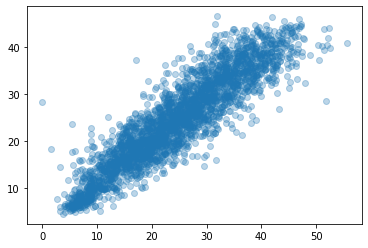

In [42]:
plt.scatter(train_targets, oof_preds, alpha=0.3)